Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
▶ 프로젝트 폴더 목록: ['고령인구비율_시도_시_군_구.xlsx', 'crime_region_2020_2024.xlsx', 'crime_region_2020_2024.csv', 'crime_rate_region_2020_2024.csv', 'crime_rate_region_2020_2024.xlsx', 'victim_gender_trend.xlsx', 'victim_gender_trend.csv', 'victim_age_trend_2020_2024.csv', 'victim_age_trend_2020_2024.xlsx', 'victim_senior_by_crimetype_final.csv', 'victim_senior_by_crimetype_final.xlsx', 'figs', 'victim_senior_summary_성별별_전체비율.csv', 'merged_population_crime_2024.csv', 'victim_senior_processed.csv']

[데이터 로드 확인]
df_region     : (11, 5)
victim_senior : (38, 10)
victim_age    : (8, 11)
victim_gender : (32, 12)


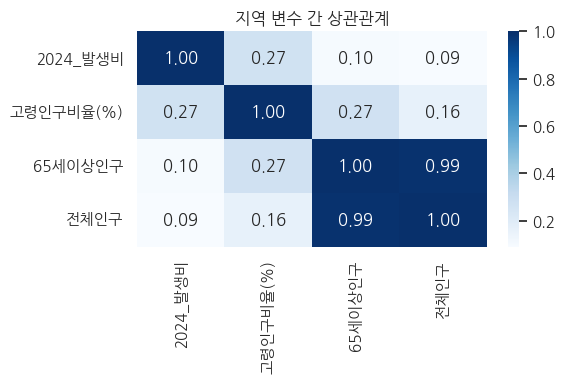


고령인구비율 vs 2024_발생비 상관계수: 0.269


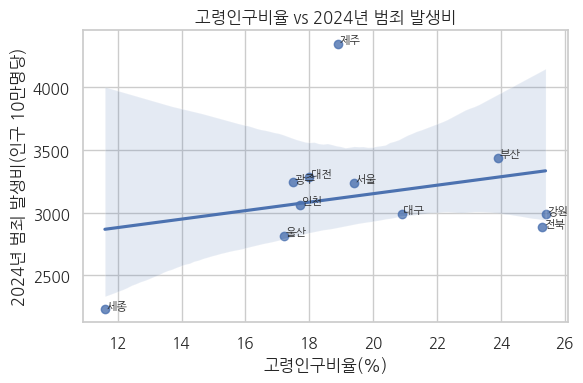


[선형회귀 결과]
R²: -10.668
RMSE: 608.142
회귀계수: {'고령인구비율(%)': np.float64(116.81444234044467), '65세이상인구': np.float64(-0.0035448963325865035), '전체인구': np.float64(0.0005849313219333787)}


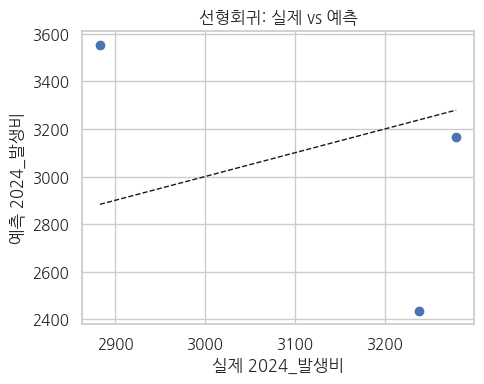


[RandomForest 결과]
R²: 0.241
RMSE: 155.068


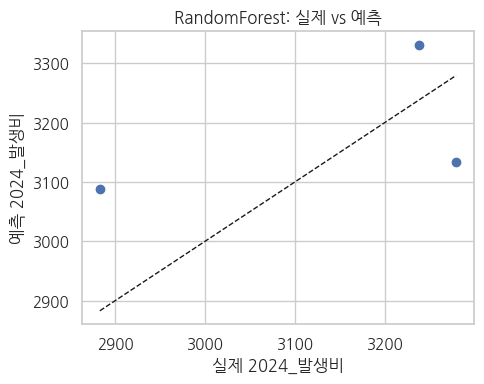

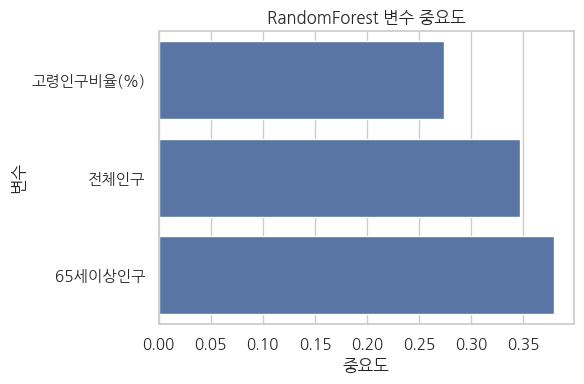


Feature Importance


,0
65세이상인구,0.379583
전체인구,0.347060
고령인구비율(%),0.273357



[Ridge-Poly2 (고령인구비율만)] RMSE 444.46 ± 252.15 | R² -1.977 ± 3.488
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[RF(tuned) (고령인구비율만)] RMSE 451.03 ± 294.51 | R² -0.797 ± 0.576
※ 단일 지표만으로는 설명력이 낮다는 걸 보여주는 참고용 결과


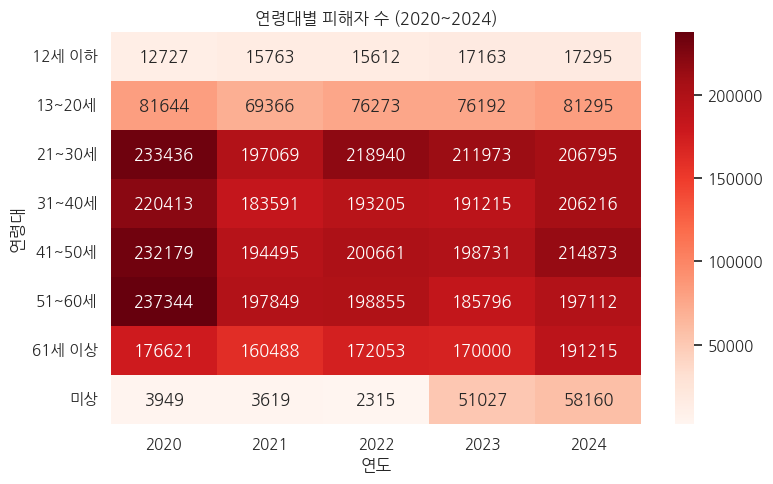

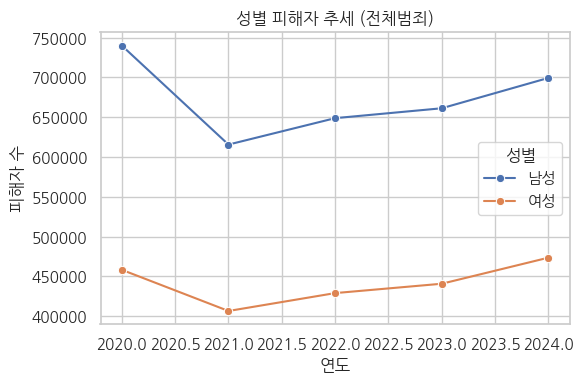

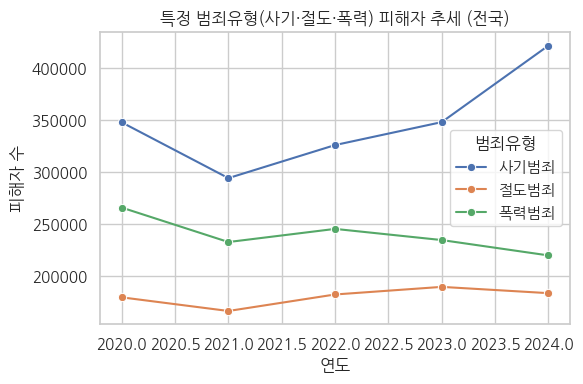


[고령층 피해자 비율 Top5 범죄유형]


,죄종,계,총_65세이상피해자수,전체_고령비율(%)
31,환경범죄,135,36.0,26.67
7,방화,770,190.0,24.68
17,직무유기,725,167.0,23.03
25,배임,2042,437.0,21.40
0,살인기수,274,58.0,21.17


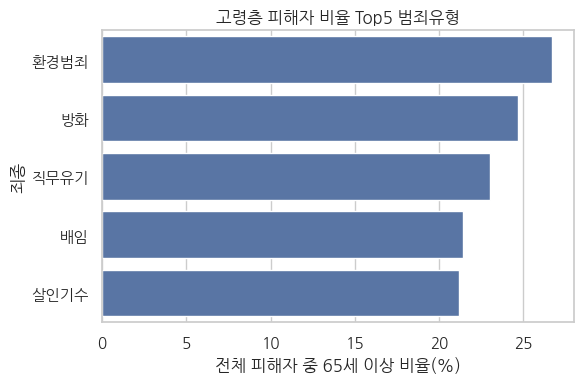


[범죄 그룹별 요약]


,범죄그룹,계,남자_65세이상,여자_65세이상,전체_고령비율(%),총_65세이상피해자,고령비율(%)_재계산
0,기타,323124,22502.0,15598.0,12.831600,38100.0,11.79
1,성범죄,21051,30.0,437.0,1.903333,467.0,2.22
2,재산범죄,683374,42514.0,24815.0,13.082000,67329.0,9.85
3,폭력범죄,159648,10831.0,7120.0,9.512000,17951.0,11.24


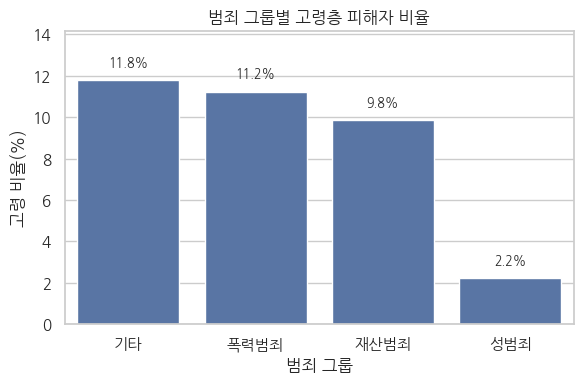


[성별별 65세 이상 비율 요약]


,구분,전체 피해자 수,65세 이상 피해자 수,65세 이상 비율(%)
0,전체,1187197,123847,10.43
1,남성,699370,75877,10.85
2,여성,472993,47970,10.14


성별 요약표 CSV 저장 완료: /content/drive/MyDrive/빅데이터프로젝트/victim_senior_summary_성별별_전체비율.csv

[죄종별 군집화 결과 요약 (k=3)]


,계,전체_고령비율(%),남성비율(%),여성비율(%)
cluster,,,,
0,10541.39,13.58,67.05,32.72
1,6472.83,3.08,18.72,81.08
2,213300.25,10.18,59.83,39.32



▶ cluster 0 상위 5개 죄종 (고령비율 기준)


,죄종,전체_고령비율(%)
31,환경범죄,26.67
7,방화,24.68
17,직무유기,23.03
25,배임,21.40
0,살인기수,21.17



▶ cluster 1 상위 5개 죄종 (고령비율 기준)


,죄종,전체_고령비율(%)
11,체포감금,10.37
5,강제추행,2.45
4,유사강간,1.67
3,강간,1.59
13,약취유인,1.58



▶ cluster 2 상위 5개 죄종 (고령비율 기준)


,죄종,전체_고령비율(%)
10,폭행,10.94
8,절도범죄,10.84
37,기타범죄,10.14
23,사기,8.81


In [2]:
# ============================================
# 0. 환경 설정 (Drive + 폰트)
# ============================================
from google.colab import drive
drive.mount("/content/drive")

import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from IPython.display import display

# 나눔고딕 설치 (Colab 전용)
subprocess.run(
    ["apt-get", "-y", "install", "fonts-nanum"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL,
)

# 한글 폰트 설정
fontpath = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(fontpath)
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid", font="NanumGothic")

# 1) Colab 환경인지 판단
if os.path.exists("/content/drive/MyDrive/빅데이터프로젝트/"):
    base_path = "/content/drive/MyDrive/빅데이터프로젝트/"
else:
    # 2) 깃허브 / 로컬 환경에서는 프로젝트 루트 기준 ./data/ 사용
    base_path = "./data/"


# ============================================
# 1. 분석에 사용할 데이터 로드
#    (전처리 노트북에서 저장된 결과 + 원본 일부)
# ============================================
df_region = pd.read_csv(base_path + "merged_population_crime_2024.csv", encoding="utf-8-sig")
victim_senior = pd.read_csv(base_path + "victim_senior_processed.csv", encoding="utf-8-sig")

victim_age = pd.read_csv(base_path + "victim_age_trend_2020_2024.csv", encoding="utf-8-sig")
victim_gender = pd.read_csv(base_path + "victim_gender_trend.csv", encoding="utf-8-sig")

print("\n[데이터 로드 확인]")
print("df_region     :", df_region.shape)
print("victim_senior :", victim_senior.shape)
print("victim_age    :", victim_age.shape)
print("victim_gender :", victim_gender.shape)


# ============================================
# 2. 지역 분석 (상관, 선형회귀, RandomForest)
# ============================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 상관 히트맵
plt.figure(figsize=(6, 4))
corr = df_region[["2024_발생비", "고령인구비율(%)", "65세이상인구", "전체인구"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("지역 변수 간 상관관계")
plt.tight_layout()
plt.show()

# 고령인구비율 vs 발생비 상관계수
corr_coef = df_region["고령인구비율(%)"].corr(df_region["2024_발생비"])
print(f"\n고령인구비율 vs 2024_발생비 상관계수: {corr_coef:.3f}")

# 산점도 + 회귀선 + 지역 라벨
plt.figure(figsize=(6, 4))
sns.regplot(data=df_region, x="고령인구비율(%)", y="2024_발생비")
for _, row in df_region.iterrows():
    plt.text(
        row["고령인구비율(%)"] + 0.05,
        row["2024_발생비"] + 5,
        row["지역"],
        fontsize=8,
    )
plt.title("고령인구비율 vs 2024년 범죄 발생비")
plt.xlabel("고령인구비율(%)")
plt.ylabel("2024년 범죄 발생비(인구 10만명당)")
plt.tight_layout()
plt.show()

# 회귀/랜덤포레스트용 데이터
X = df_region[["고령인구비율(%)", "65세이상인구", "전체인구"]]
y = df_region["2024_발생비"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 선형회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("\n[선형회귀 결과]")
print(f"R²: {r2_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print("회귀계수:", dict(zip(X.columns, lr.coef_)))

plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_lr)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "k--",
    linewidth=1,
)
plt.xlabel("실제 2024_발생비")
plt.ylabel("예측 2024_발생비")
plt.title("선형회귀: 실제 vs 예측")
plt.tight_layout()
plt.show()

# RandomForest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\n[RandomForest 결과]")
print(f"R²: {r2_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")

plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_rf)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "k--",
    linewidth=1,
)
plt.xlabel("실제 2024_발생비")
plt.ylabel("예측 2024_발생비")
plt.title("RandomForest: 실제 vs 예측")
plt.tight_layout()
plt.show()

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(
    ascending=True
)

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=importances.index)
plt.title("RandomForest 변수 중요도")
plt.xlabel("중요도")
plt.ylabel("변수")
plt.tight_layout()
plt.show()

print("\nFeature Importance")
display(importances.sort_values(ascending=False))


# ============================================
# 3. 고령인구비율 단일 변수 기반 CV 실험
#    (Ridge + Poly, RandomForest 튜닝)
# ============================================
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score
from scipy.stats import randint

def rmse_cv(model, X_, y_, cv):
    neg_mse = cross_val_score(model, X_, y_, scoring="neg_mean_squared_error", cv=cv)
    rmse = np.sqrt(-neg_mse)
    return rmse.mean(), rmse.std()

def r2_cv(model, X_, y_, cv):
    scores = cross_val_score(model, X_, y_, scoring="r2", cv=cv)
    return scores.mean(), scores.std()

X_slim = df_region[["고령인구비율(%)"]]
y_slim = df_region["2024_발생비"]
cv = KFold(n_splits=5, shuffle=True, random_state=42)

ridge2 = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    Ridge(alpha=1.0),
)

rmse_mean, rmse_std = rmse_cv(ridge2, X_slim, y_slim, cv)
r2_mean, r2_std = r2_cv(ridge2, X_slim, y_slim, cv)

print(
    f"\n[Ridge-Poly2 (고령인구비율만)] "
    f"RMSE {rmse_mean:.2f} ± {rmse_std:.2f} | R² {r2_mean:.3f} ± {r2_std:.3f}"
)

rf_base = RandomForestRegressor(random_state=42)

param_dist = {
    "n_estimators": randint(120, 360),
    "max_depth": [None, 3, 5, 7],
    "min_samples_split": randint(2, 8),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["sqrt", None],
}

rs = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring="r2",
    n_jobs=-1,
    random_state=42,
    verbose=1,
)
rs.fit(X_slim, y_slim)
best_rf_slim = rs.best_estimator_

rmse_mean, rmse_std = rmse_cv(best_rf_slim, X_slim, y_slim, cv)
r2_mean, r2_std = r2_cv(best_rf_slim, X_slim, y_slim, cv)

print(
    f"[RF(tuned) (고령인구비율만)] "
    f"RMSE {rmse_mean:.2f} ± {rmse_std:.2f} | R² {r2_mean:.3f} ± {r2_std:.3f}"
)
print("※ 단일 지표만으로는 설명력이 낮다는 걸 보여주는 참고용 결과")


# ============================================
# 4. 연령대별 피해자 추세 (2020~2024, 히트맵)
# ============================================
age_df = victim_age.copy()
age_df = age_df.replace(",", "", regex=True)

count_cols_age = [c for c in age_df.columns if "_건수" in c]
for col in count_cols_age:
    age_df[col] = pd.to_numeric(age_df[col], errors="coerce")

age_long = age_df.melt(
    id_vars=["연령대"],
    value_vars=count_cols_age,
    var_name="연도",
    value_name="피해자수",
)
age_long["연도"] = age_long["연도"].str.extract(r"(\d{4})").astype(int)

age_pivot = age_long.pivot_table(index="연령대", columns="연도", values="피해자수")

plt.figure(figsize=(8, 5))
sns.heatmap(age_pivot, annot=True, fmt=".0f", cmap="Reds")
plt.title("연령대별 피해자 수 (2020~2024)")
plt.xlabel("연도")
plt.ylabel("연령대")
plt.tight_layout()
plt.show()


# ============================================
# 5. 성별 피해자 추세 (전체범죄 기준)
# ============================================
gender_df = victim_gender.copy()
gender_df = gender_df.replace(",", "", regex=True)

count_cols_gender = [c for c in gender_df.columns if "_건수" in c]
for col in count_cols_gender:
    gender_df[col] = pd.to_numeric(gender_df[col], errors="coerce")

overall = gender_df[gender_df["범죄유형"] == "전체범죄"]
overall_sex = overall[overall["성별"].isin(["남성", "여성"])].copy()

gender_long = overall_sex.melt(
    id_vars=["성별"],
    value_vars=count_cols_gender,
    var_name="연도",
    value_name="피해자수",
)
gender_long["연도"] = gender_long["연도"].str.extract(r"(\d{4})").astype(int)

plt.figure(figsize=(6, 4))
sns.lineplot(data=gender_long, x="연도", y="피해자수", hue="성별", marker="o")
plt.title("성별 피해자 추세 (전체범죄)")
plt.xlabel("연도")
plt.ylabel("피해자 수")
plt.tight_layout()
plt.show()


# ============================================
# 5-1. 특정 범죄유형(사기·절도·폭력) 추세 (전국)
# ============================================
selected_crimes = ["사기범죄", "절도범죄", "폭력범죄"]
crime_trend_records = []

for crime in selected_crimes:
    row = gender_df[(gender_df["범죄유형"] == crime) & (gender_df["성별"] == "계")]
    if row.empty:
        continue
    row = row.iloc[0]
    record = {"범죄유형": crime}
    for col in count_cols_gender:
        year = col.split("_")[0]
        record[year] = row[col]
    crime_trend_records.append(record)

if crime_trend_records:
    crime_trend_df = pd.DataFrame(crime_trend_records).set_index("범죄유형").T
    crime_trend_df.index.name = "년도"
    crime_trend_df.index = crime_trend_df.index.astype(int)
    crime_trend_df = crime_trend_df.sort_index()

    crime_trend_long = crime_trend_df.reset_index().melt(
        id_vars=["년도"], var_name="범죄유형", value_name="피해자수"
    )

    plt.figure(figsize=(6, 4))
    sns.lineplot(
        data=crime_trend_long,
        x="년도",
        y="피해자수",
        hue="범죄유형",
        marker="o",
    )
    plt.title("특정 범죄유형(사기·절도·폭력) 피해자 추세 (전국)")
    plt.xlabel("연도")
    plt.ylabel("피해자 수")
    plt.tight_layout()
    plt.show()


# ============================================
# 6. 죄종별 고령층 피해자 분석 (Top5)
# ============================================
top5_crime = victim_senior.sort_values(
    "전체_고령비율(%)", ascending=False
).head(5)

print("\n[고령층 피해자 비율 Top5 범죄유형]")
display(top5_crime[["죄종", "계", "총_65세이상피해자수", "전체_고령비율(%)"]])

plt.figure(figsize=(6, 4))
sns.barplot(
    data=top5_crime,
    x="전체_고령비율(%)",
    y="죄종",
    orient="h",
)
plt.title("고령층 피해자 비율 Top5 범죄유형")
plt.xlabel("전체 피해자 중 65세 이상 비율(%)")
plt.ylabel("죄종")
plt.tight_layout()
plt.show()


# ============================================
# 7. 범죄 그룹(재산·폭력·성범죄·기타)별 고령층 비율
# ============================================
def map_crime_group(name: str) -> str:
    if any(k in name for k in ["강간", "강제추행", "성폭력"]):
        return "성범죄"
    if any(k in name for k in ["폭행", "상해", "협박", "체포", "감금", "약취", "유인", "인질"]):
        return "폭력범죄"
    if any(k in name for k in ["절도", "사기", "횡령", "배임", "손괴"]):
        return "재산범죄"
    return "기타"

victim_senior["범죄그룹"] = victim_senior["죄종"].astype(str).apply(map_crime_group)

group_summary = (
    victim_senior.groupby("범죄그룹")
    .agg(
        {
            "계": "sum",
            "남자_65세이상": "sum",
            "여자_65세이상": "sum",
            "전체_고령비율(%)": "mean",
        }
    )
    .reset_index()
)

group_summary["총_65세이상피해자"] = (
    group_summary["남자_65세이상"] + group_summary["여자_65세이상"]
)
group_summary["고령비율(%)_재계산"] = (
    group_summary["총_65세이상피해자"] / group_summary["계"] * 100
).round(2)

print("\n[범죄 그룹별 요약]")
display(group_summary)

plt.figure(figsize=(6, 4))
plot_df = group_summary.sort_values("고령비율(%)_재계산", ascending=False)
sns.barplot(data=plot_df, x="범죄그룹", y="고령비율(%)_재계산")
plt.title("범죄 그룹별 고령층 피해자 비율")
plt.xlabel("범죄 그룹")
plt.ylabel("고령 비율(%)")
plt.ylim(0, plot_df["고령비율(%)_재계산"].max() * 1.2)
for idx, row in plot_df.reset_index(drop=True).iterrows():
    plt.text(
        idx,
        row["고령비율(%)_재계산"] + 0.5,
        f"{row['고령비율(%)_재계산']:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9,
    )
plt.tight_layout()
plt.show()


# ============================================
# 8. 성별별 전체 vs 65세 이상 피해자 비율 요약
# ============================================
total_victims = victim_senior["계"].sum()
male_total = victim_senior["남자_소계"].sum()
female_total = victim_senior["여자_소계"].sum()

male_65 = victim_senior["남자_65세이상"].sum()
female_65 = victim_senior["여자_65세이상"].sum()
total_65 = male_65 + female_65

summary_rows = [
    {
        "구분": "전체",
        "전체 피해자 수": int(total_victims),
        "65세 이상 피해자 수": int(total_65),
        "65세 이상 비율(%)": round(total_65 / total_victims * 100, 2),
    },
    {
        "구분": "남성",
        "전체 피해자 수": int(male_total),
        "65세 이상 피해자 수": int(male_65),
        "65세 이상 비율(%)": round(male_65 / male_total * 100, 2),
    },
    {
        "구분": "여성",
        "전체 피해자 수": int(female_total),
        "65세 이상 피해자 수": int(female_65),
        "65세 이상 비율(%)": round(female_65 / female_total * 100, 2),
    },
]

summary_df = pd.DataFrame(summary_rows)

print("\n[성별별 65세 이상 비율 요약]")
display(summary_df)

summary_path = base_path + "victim_senior_summary_성별별_전체비율.csv"
summary_df.to_csv(summary_path, index=False, encoding="utf-8-sig")
print("성별 요약표 CSV 저장 완료:", summary_path)


# ============================================
# 9. 죄종별 군집화 (KMeans, k=3)
# ============================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_df = victim_senior.copy()

cluster_df["남성비율(%)"] = cluster_df["남자_소계"] / cluster_df["계"] * 100
cluster_df["여성비율(%)"] = cluster_df["여자_소계"] / cluster_df["계"] * 100

cluster_df = cluster_df[cluster_df["계"] > 0].copy()

feature_cols = ["계", "전체_고령비율(%)", "남성비율(%)", "여성비율(%)"]
features = cluster_df[feature_cols].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_df["cluster"] = kmeans.fit_predict(X_scaled)

cluster_summary = (
    cluster_df.groupby("cluster")[feature_cols]
    .mean()
    .round(2)
)

print("\n[죄종별 군집화 결과 요약 (k=3)]")
display(cluster_summary)

for c in sorted(cluster_df["cluster"].unique()):
    sample = (
        cluster_df[cluster_df["cluster"] == c]
        .sort_values("전체_고령비율(%)", ascending=False)
        .loc[:, ["죄종", "전체_고령비율(%)"]]
        .head(5)
    )
    print(f"\n▶ cluster {c} 상위 5개 죄종 (고령비율 기준)")
    display(sample)
